# Multiple Linear Regression Assignment
## Toyota Corolla Data
Prepare a prediction model for predicting Price.

In [207]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_palette('deep')

### Data Description

- Model -- model of the car
- Age_08_04 -- Age in months as in August 2004	
- Price  -- Offer Price in EUROs	
- Mfg_Month -- Manufacturing month (1-12)	
- Mfg_Year	-- Manufacturing Year
- KM -- Accumulated Kilometers on odometer
- Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
- HP -- Horse Power
- Met_Color	 -- Metallic Color?  (Yes=1, No=0)
- Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
- Automatic	-- Automatic  (Yes=1, No=0)
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Cylinders	-- Number of cylinders
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms
- Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
- BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
- Guarantee_Period -- 	Guarantee period in months
- ABS -- Anti-Lock Brake System (Yes=1, No=0)
- Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
- Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
- Airco -- Airconditioning  (Yes=1, No=0)
- Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
- Boardcomputer -- Boardcomputer  (Yes=1, No=0)
- CD_Player -- CD Player  (Yes=1, No=0)
- Central_Lock -- Central Lock  (Yes=1, No=0)
- Powered_Windows -- Powered Windows  (Yes=1, No=0)
- Power_Steering -- Power Steering  (Yes=1, No=0)
- Radio -- Radio  (Yes=1, No=0)
- Mistlamps	-- Mistlamps  (Yes=1, No=0)
- Sport_Model -- Sport Model  (Yes=1, No=0)
- Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
- Metallic_Rim --Metallic Rim  (Yes=1, No=0)
- Radio_cassette -- Radio Cassette  (Yes=1, No=0)
- Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [208]:
data = pd.read_csv('ToyotaCorolla.csv', encoding='iso-8859-1', index_col='Id')
data.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [209]:
data = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [210]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


In [211]:
pd.DataFrame({'Column':data.columns,
              'NA count':[data[column].isna().sum() for column in data.columns],
              'Dtype':[data[column].dtype for column in data.columns],
              'Nunique':[data[column].nunique() for column in data.columns]})

,Column,NA count,Dtype,Nunique
0,Price,0,int64,236
1,Age_08_04,0,int64,77
2,KM,0,int64,1263
3,HP,0,int64,12
4,cc,0,int64,13
5,Doors,0,int64,4
6,Gears,0,int64,4
7,Quarterly_Tax,0,int64,13
8,Weight,0,int64,59


In [212]:
num_columns = ['Price','Age_08_04','KM','HP','cc','Quarterly_Tax','Weight']
cat_columns = ['Doors','Gears']

### Data Visualization
#### Univariate Analysis

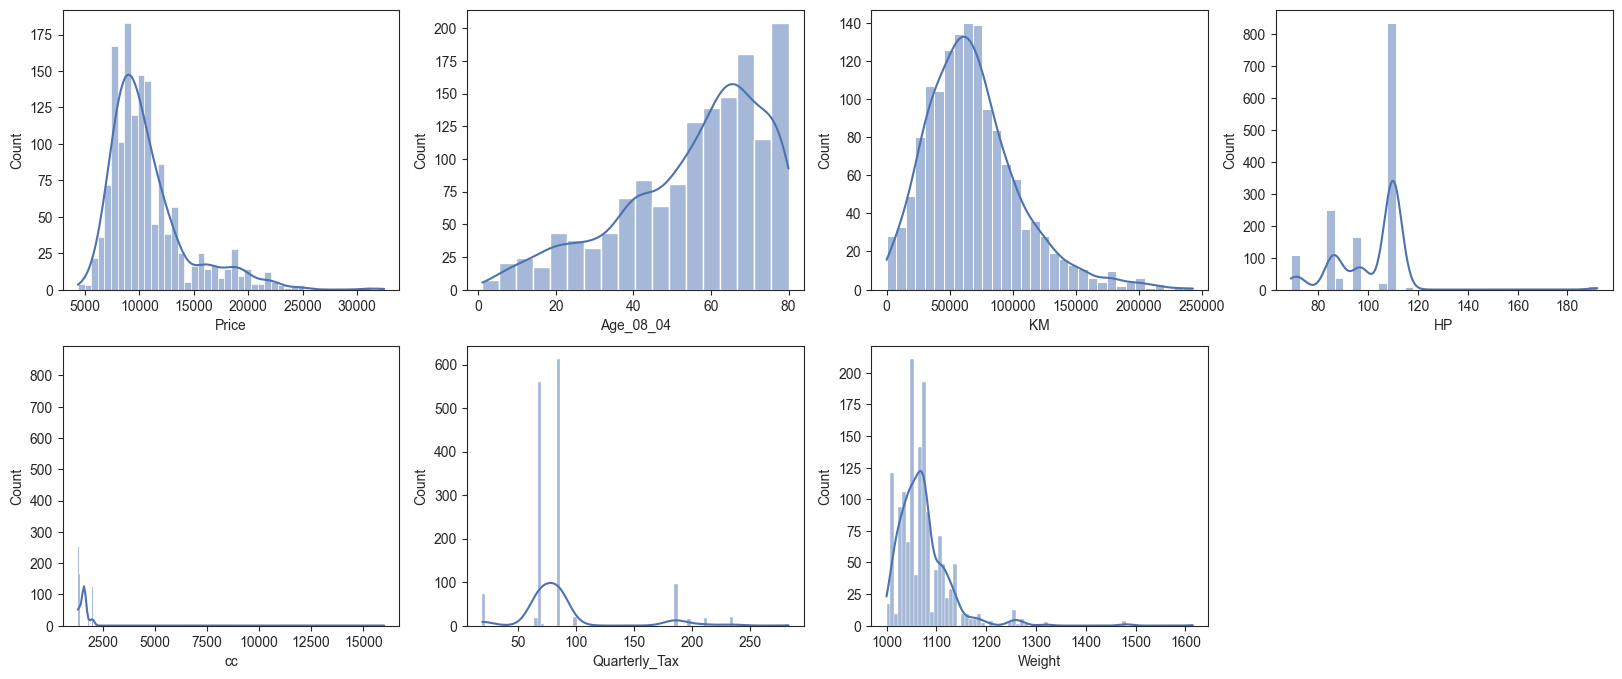

In [213]:
plt.figure(figsize=(20,8))
for i in range(len(num_columns)):
    plt.subplot(2,4,i+1)
    sns.histplot(data=data, x=num_columns[i], kde=True)

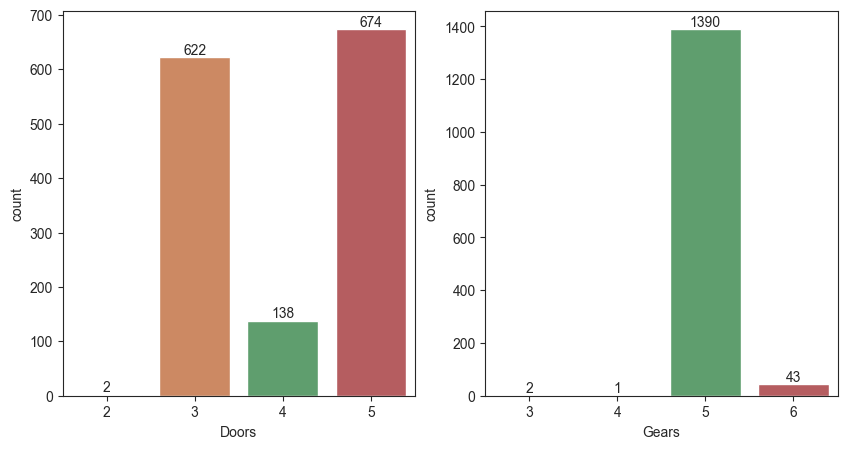

In [214]:
figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for i in range(len(cat_columns)):
    sns.countplot(data=data, x=cat_columns[i], ax=axes[i])
    axes[i].bar_label(axes[i].containers[0]);

<Axes: xlabel='cc'>

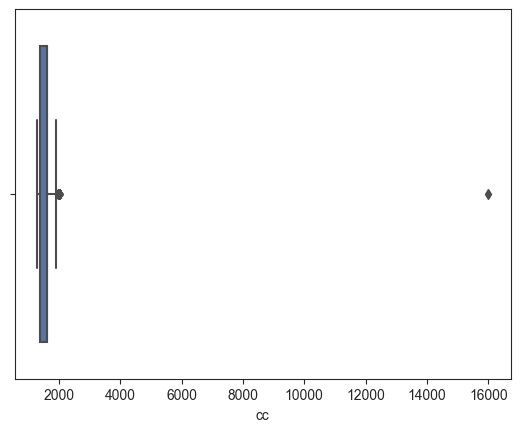

In [215]:
sns.boxplot(data=data, x='cc')

Removing the outlier in ***cc*** variable

In [216]:
data.drop(data[data['cc']>14000].index, axis=0, inplace=True)

#### Multivariate Analysis

<Figure size 2000x800 with 0 Axes>

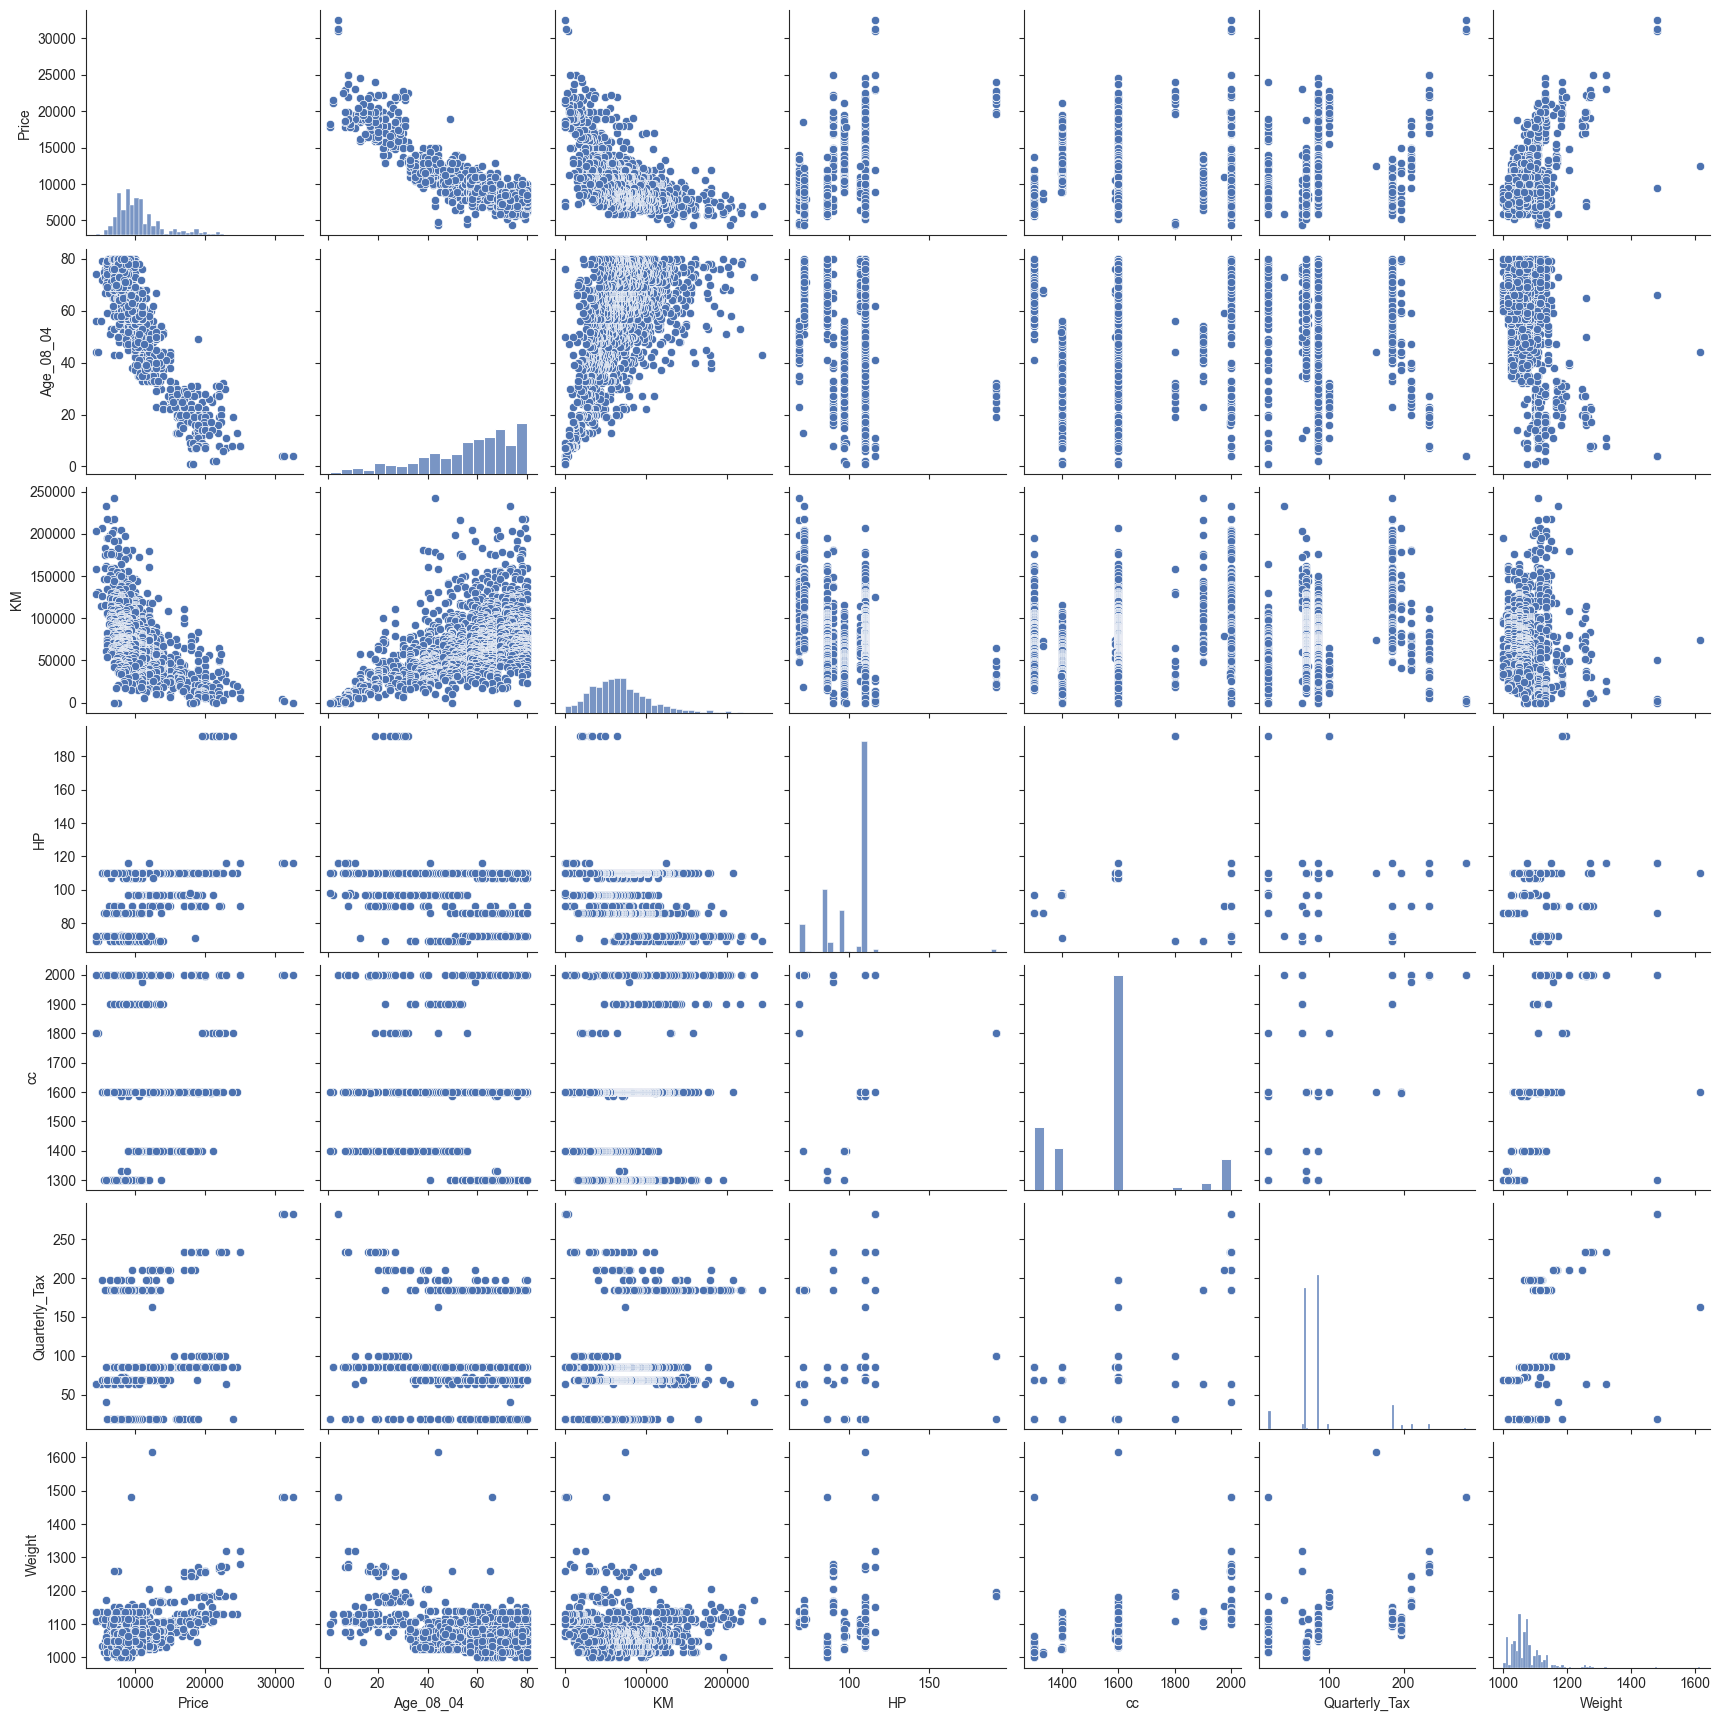

In [217]:
plt.figure(figsize=(20,8))
sns.pairplot(data=data[num_columns])

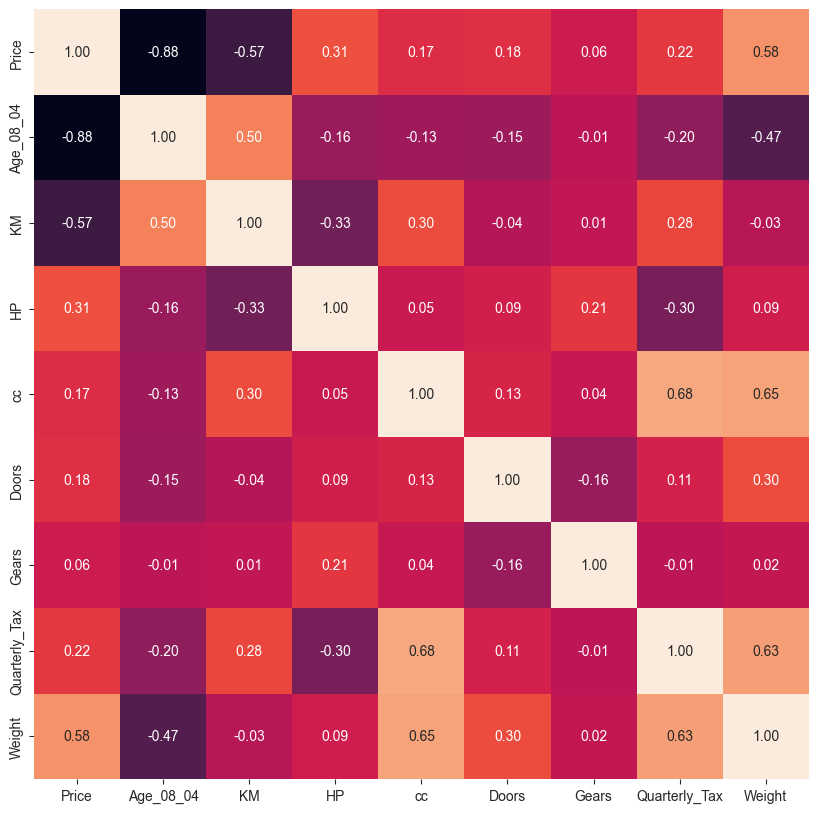

In [218]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(),cbar=False,annot=True,fmt='.2f');

### Building Raw Models

Renaming column names to ease up writing models

In [219]:
data = data.rename(columns={'Price':'PRICE','Age_08_04':'AGE','cc':'CC','Doors':'DS','Gears':'GS','Quarterly_Tax':'QT','Weight':'WT'})

In [220]:
data.head()

,PRICE,AGE,KM,HP,CC,DS,GS,QT,WT
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


VIF shows inter-correlation between dependent variables

In [221]:
vars = ['AGE','WT','KM','HP','QT','DS','CC','GS']
vif = []
rsq_all = []
for var in vars:
    rsq = smf.ols(var+'~'+'+'.join([str(e) for e in vars if e!=var]), data=data).fit().rsquared
    rsq_all.append(rsq)
    vif.append(1/(1-rsq))

vif_frame = pd.DataFrame({'variables':vars,'VIF':vif})
vif_frame.sort_values('VIF')

,variables,VIF
7,GS,1.100907
5,DS,1.163178
3,HP,1.583835
0,AGE,1.887229
2,KM,1.909570
6,CC,2.754405
4,QT,2.859861
1,WT,2.864117


In [222]:
from scipy.stats import pearsonr
dict([(column, np.round(np.abs(pearsonr(data[column],data['PRICE'])[0]),2)) for column in data.columns])

{'PRICE': 1.0,
 'AGE': 0.88,
 'KM': 0.57,
 'HP': 0.31,
 'CC': 0.17,
 'DS': 0.18,
 'GS': 0.06,
 'QT': 0.22,
 'WT': 0.58}

From pearsonr coeffiecients, we get order of variables which are highly correlated to target variable.

We will add variables to model in decreasing order of correlation, hence investigating is any ill-informed variable.

In [223]:
vars = ['AGE','WT','KM','HP','QT','DS','CC','GS']
start = "PRICE~AGE"
names = ['AGE']
model = smf.ols(start,data=data).fit()
rsquared = [model.rsquared]
adj_rsquared = [model.rsquared_adj]
aic = [model.aic]
for i in range(len(vars)-1):
    start += "+"+vars[i+1]
    names.append(names[-1]+"+"+vars[i+1])
    model = smf.ols(start,data=data).fit()
    rsquared.append(model.rsquared)
    adj_rsquared.append(model.rsquared_adj)
    aic.append(model.aic)

pd.DataFrame({'aic':aic,'rsquared':rsquared,'adj_rsquared':adj_rsquared},index=names)

,aic,rsquared,adj_rsquared
AGE,25497.376784,0.768036,0.767874
AGE+WT,25253.436251,0.804571,0.804298
AGE+WT+KM,24898.214388,0.847638,0.847318
AGE+WT+KM+HP,24764.783994,0.861360,0.860972
AGE+WT+KM+HP+QT,24757.270480,0.862276,0.861794
AGE+WT+KM+HP+QT+DS,24758.894064,0.862312,0.861733
AGE+WT+KM+HP+QT+DS+CC,24692.688478,0.868703,0.868059
AGE+WT+KM+HP+QT+DS+CC+GS,24687.281024,0.869379,0.868646


We will use model with all variables included

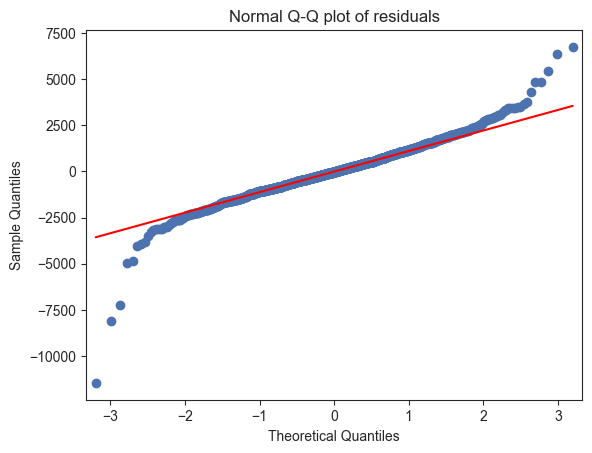

In [224]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q');
plt.title("Normal Q-Q plot of residuals");

In [225]:
np.where(model.resid<-8000)

(array([220, 959], dtype=int64),)

Text(0, 0.5, 'Cooks Distance')

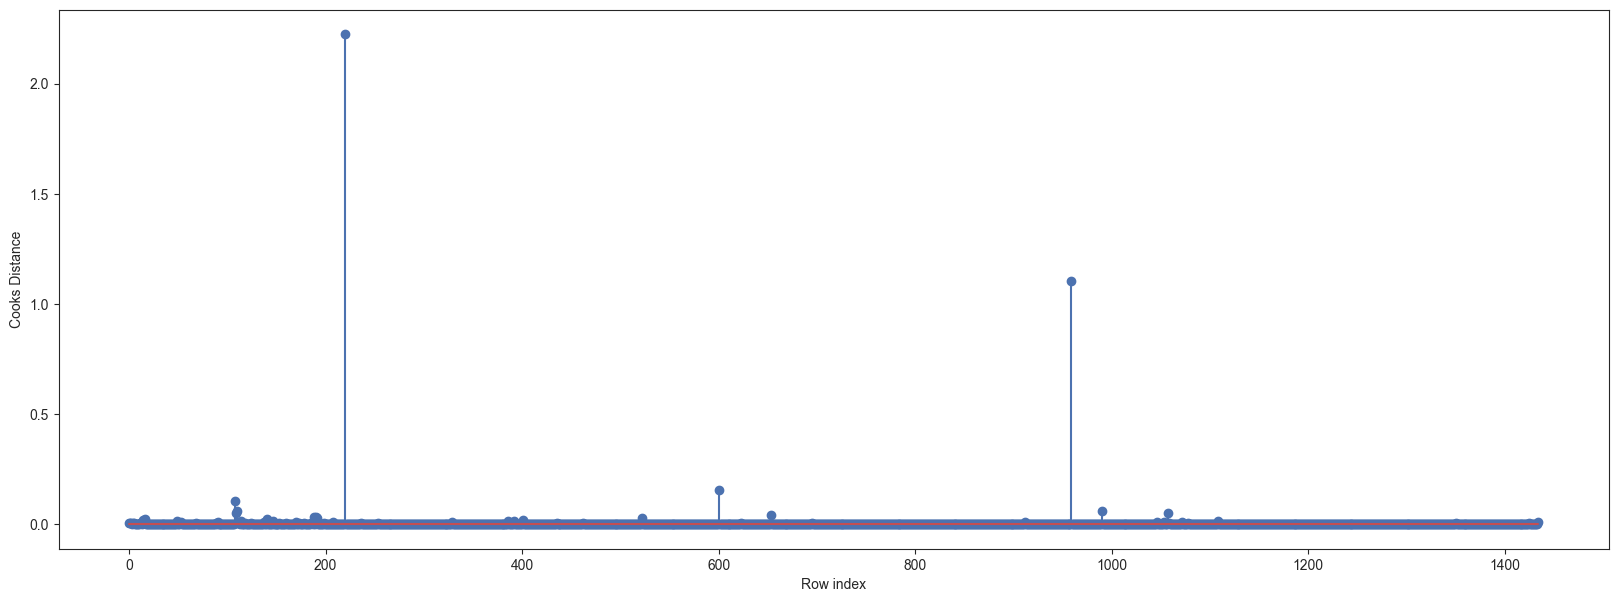

In [226]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [227]:
np.where(c>1.0)

(array([220, 959], dtype=int64),)

Removing outlier point obtained from residual qq plot and cooks distance plot

In [228]:
data2 = data.drop(data.index[[220,959]],axis=0)

### Building second model with updated data

In [229]:
model2 = smf.ols('PRICE~AGE+WT+KM+HP+QT+DS+CC+GS',data=data2).fit()
print('rsquared: ',model2.rsquared)
print('adjusted rsquared: ', model2.rsquared_adj)
print('aic: ',model2.aic)

rsquared:  0.8851845904421738
adjusted rsquared:  0.8845395600513994
aic:  24469.715205158594


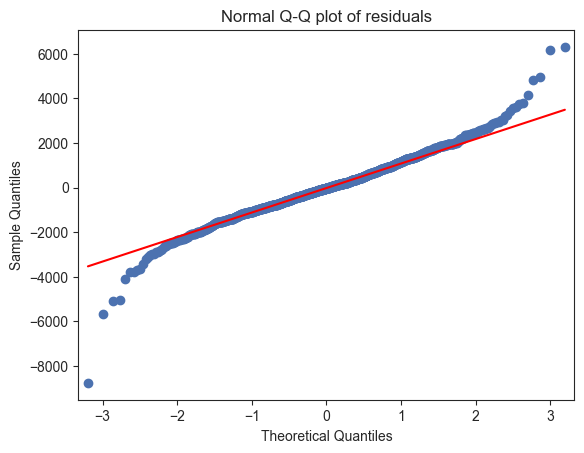

In [230]:
import statsmodels.api as sm
qqplot = sm.qqplot(model2.resid, line='q');
plt.title("Normal Q-Q plot of residuals");

In [231]:
np.where(model2.resid<-6000)

(array([599], dtype=int64),)

Text(0, 0.5, 'Cooks Distance')

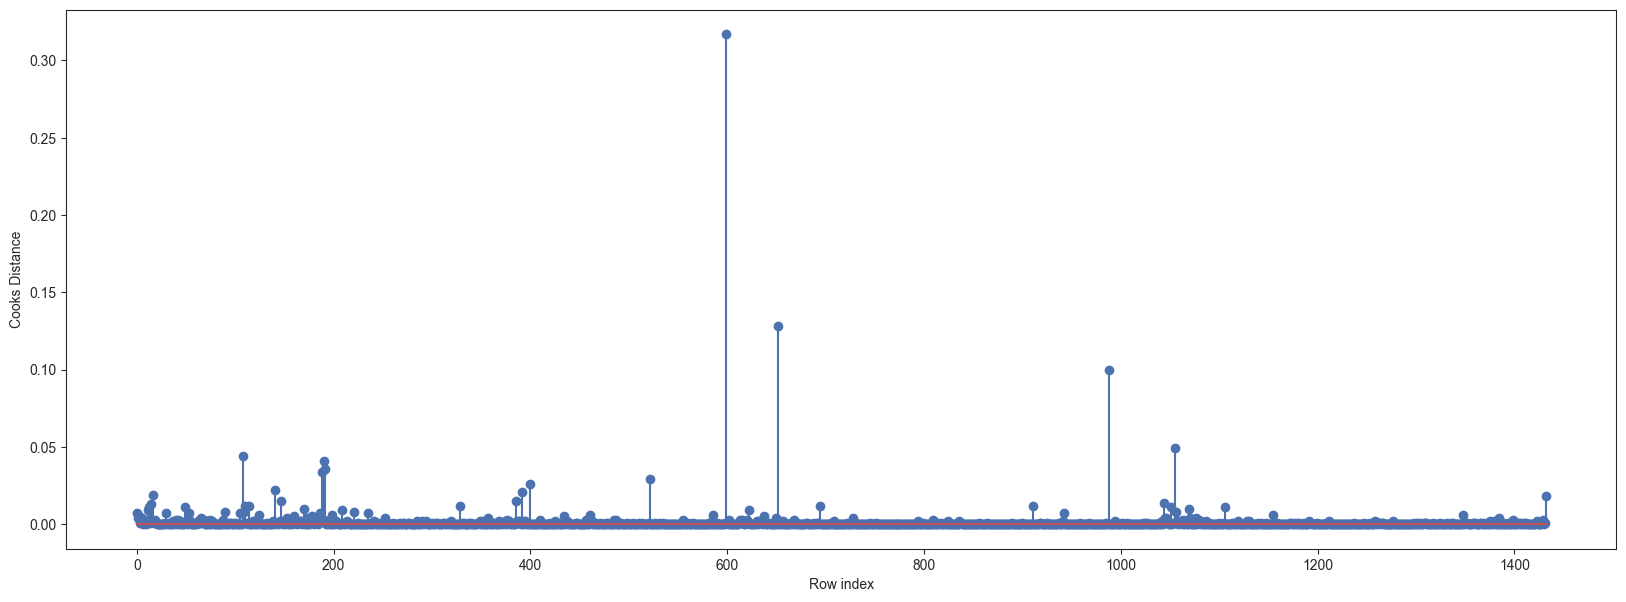

In [232]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [233]:
np.argmax(c), np.max(c)

(599, 0.31661315281459945)

Removing outlier point obtained from residual qq plot and cooks distance plot

In [234]:
data3 = data2.drop(data2.index[599],axis=0)

### Building third model with updated data

In [235]:
model3 = smf.ols('PRICE~AGE+WT+KM+HP+QT+DS+CC+GS',data=data3).fit()
print('rsquared: ',model3.rsquared)
print('adjusted rsquared: ', model3.rsquared_adj)
print('aic: ',model3.aic)

rsquared:  0.8894191849749751
adjusted rsquared:  0.888797507870126
aic:  24399.04559187014


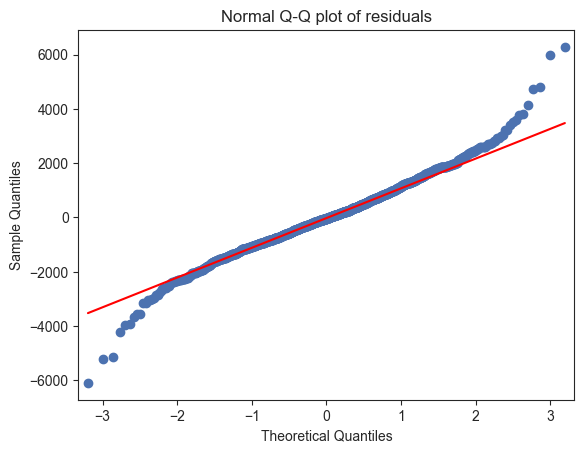

In [236]:
import statsmodels.api as sm
qqplot = sm.qqplot(model3.resid, line='q');
plt.title("Normal Q-Q plot of residuals");

Text(0, 0.5, 'Cooks Distance')

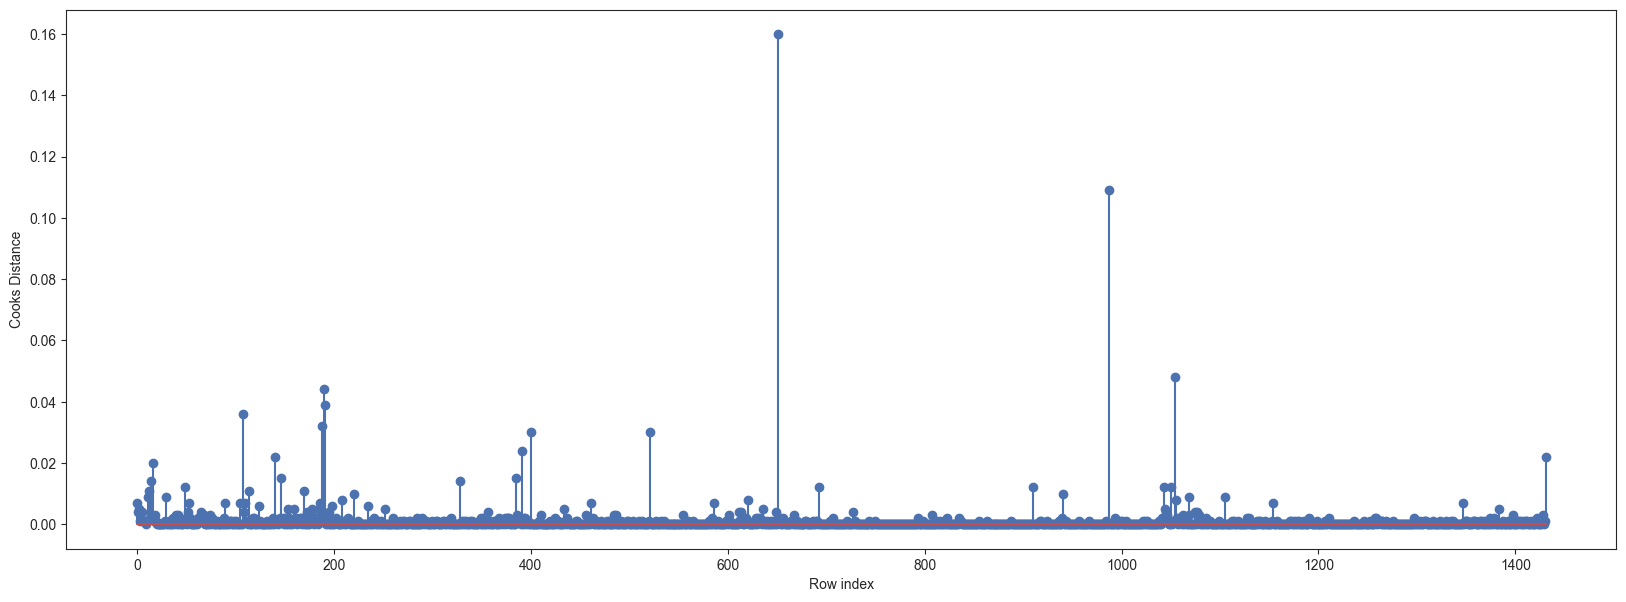

In [237]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data3)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

#### **model3 looks good!**

#### Residual Plot for Homoscedasticity

Text(0, 0.5, 'Standardized residual values')

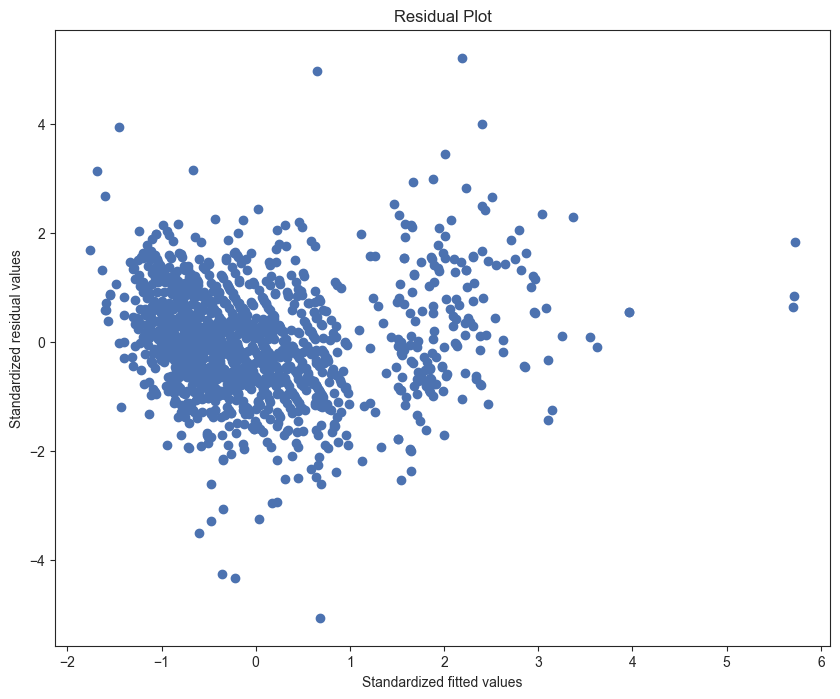

In [238]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(model3.fittedvalues), get_standardized_values(model3.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')

#### Residual vs Regressors

eval_env: 1


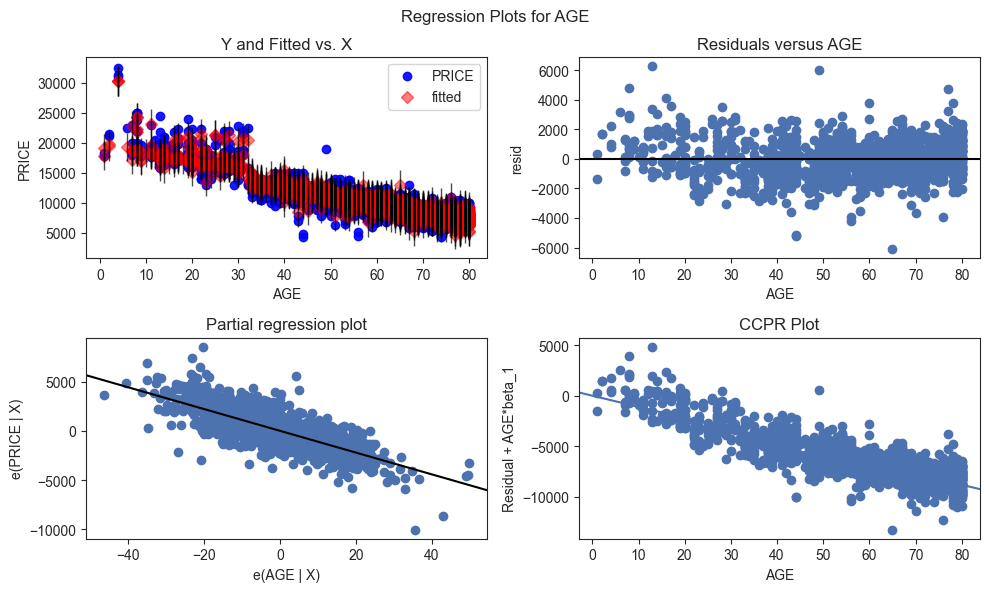

In [239]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'AGE',fig=fig)

eval_env: 1


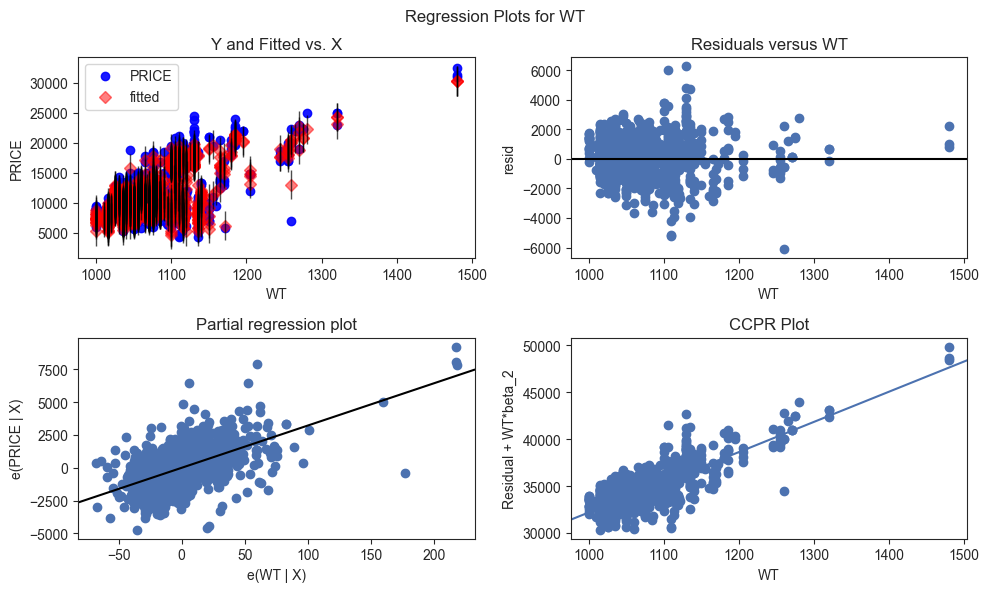

In [240]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'WT',fig=fig)

eval_env: 1


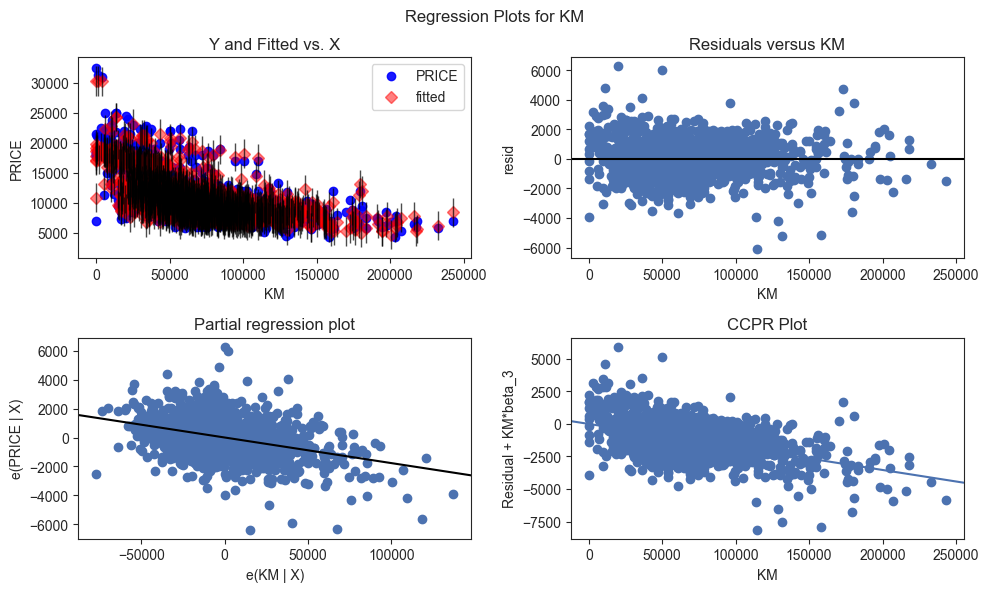

In [241]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'KM',fig=fig)

eval_env: 1


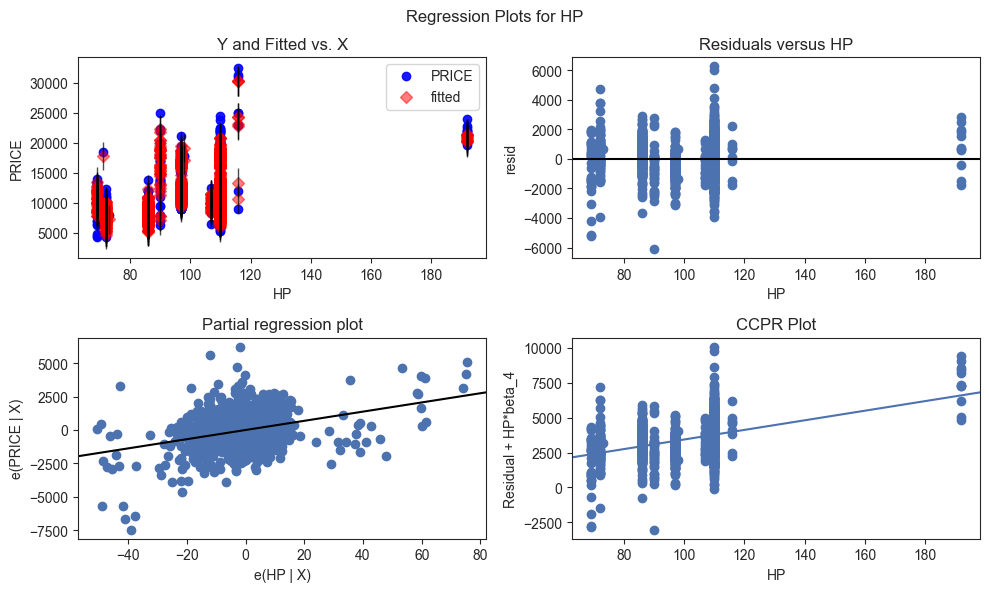

In [242]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'HP',fig=fig)

eval_env: 1


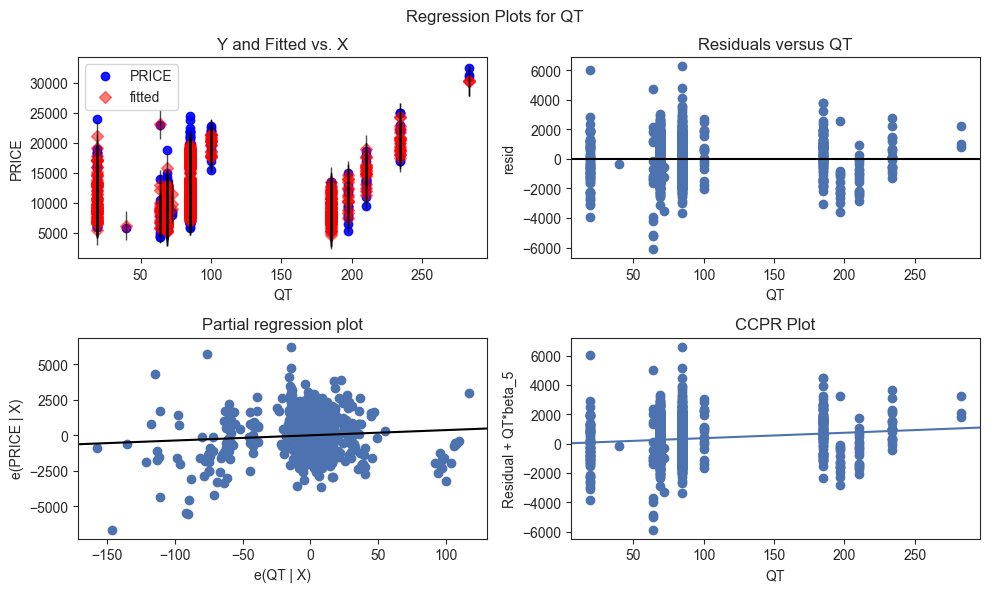

In [243]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'QT',fig=fig)

eval_env: 1


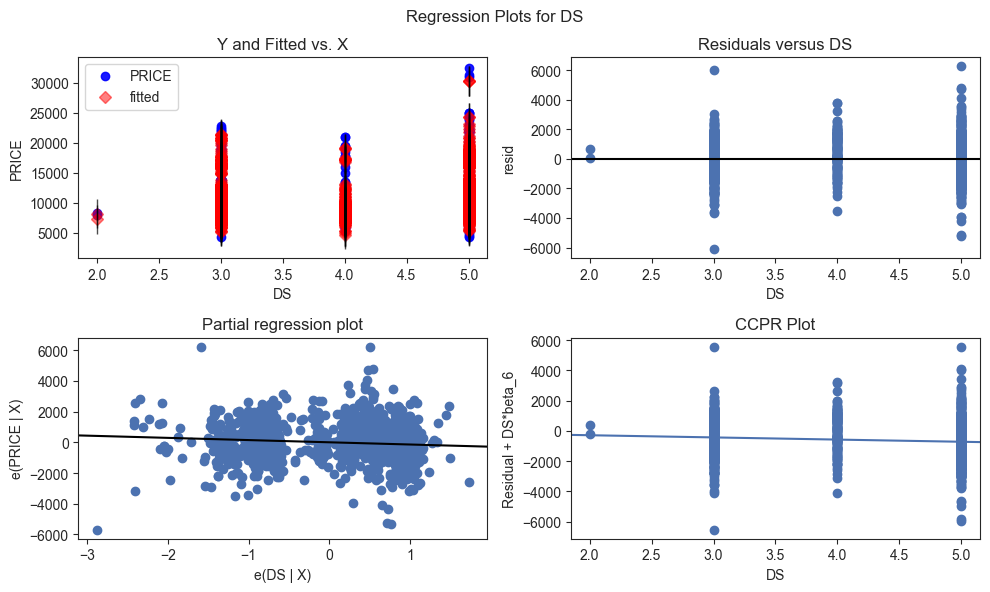

In [244]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'DS',fig=fig)

eval_env: 1


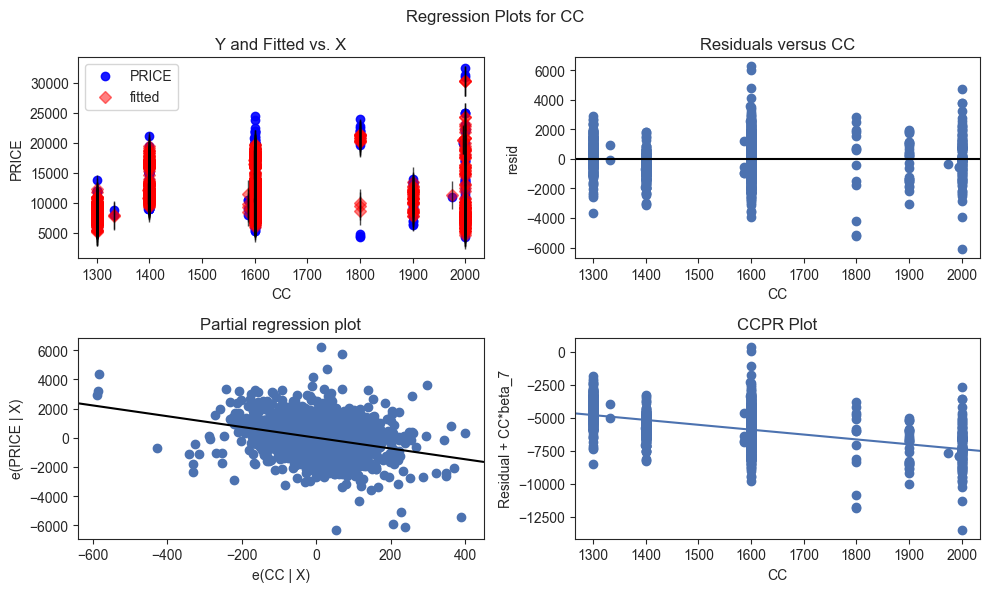

In [245]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'CC',fig=fig)

eval_env: 1


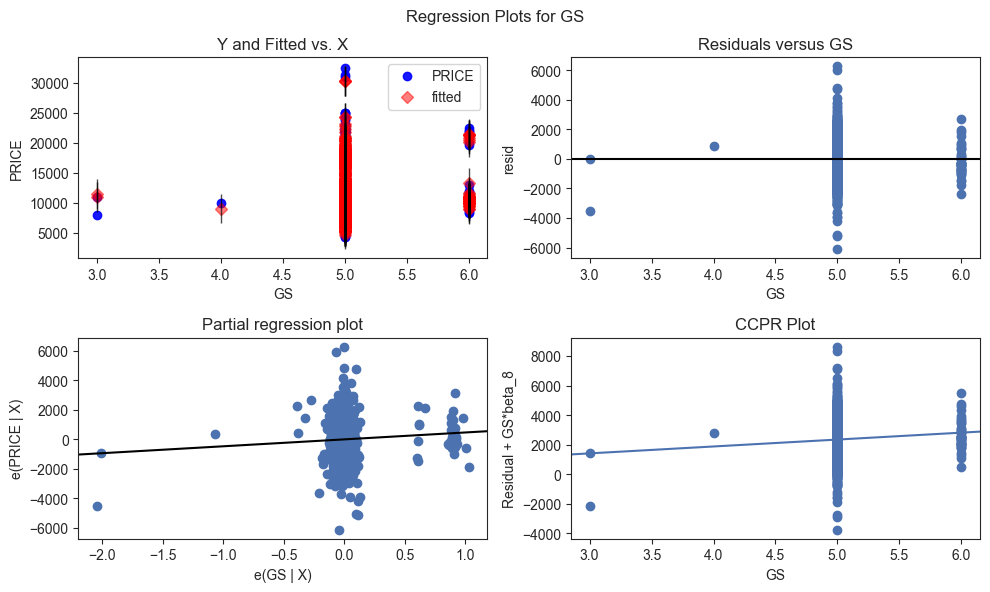

In [246]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model3,'GS',fig=fig)